In [24]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from ccdproc import ImageFileCollection
from astropy import units as u


path_img = 'M2025-06-13/obdelano/'


exact = False
resolution = 0.8 * u.arcsec 

In [7]:
# preberem seznam FITS datotek

img_collection = ImageFileCollection(path_img, glob_include='*-w.*', 
									 keywords=['object','file', 'imagetyp', 'exptime', 'filter'])   

objects = set(h['object'] for h in img_collection.headers(imagetyp='LIGHT'))
print(f'Objekti v mapi: {objects}')



Objekti v mapi: {'NGC 7039', 'IC4665'}


In [8]:
for obj in objects:
	print(f'Objekt: {obj}')
	obj_collection = img_collection.filter(imagetyp='LIGHT', object=obj)
	filters = set(h['filter'] for h in obj_collection.headers(imagetyp='LIGHT'))
	print(f'	Filtri: {filters}')

Objekt: NGC 7039
	Filtri: {'B', 'G', 'Ha'}
Objekt: IC4665
	Filtri: {'B', 'G'}


In [16]:
# Tu izberemo kaj bomo obdelali
# filtriramo zbirko slik glede na filter in objekt

filter = 'B'
object = 'IC4665'
outfile  = f"stacked_{object}_{filter}_.fts"


image_collection = img_collection.filter(imagetyp='LIGHT', filter=filter, object=object)
image_collection.summary


<Table masked=True length=18>
                  file                   object imagetyp exptime filter
                 str40                    str6    str5   float64  str1 
---------------------------------------- ------ -------- ------- ------
M2025-06-13/obdelano/IC4665_B_0001-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0002-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0003-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0004-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0005-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0006-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0007-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0008-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0009-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0010-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0011-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0012-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0013-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0014-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0015-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0016-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0017-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0018-w.fit IC4665    LIGHT    60.0      B

In [17]:
# da se znebim astropy INFO 
from astropy import log
log.setLevel('ERROR')
import warnings; warnings.simplefilter('ignore')


In [18]:

# v tabelo dam vse slike Astropy Table
table = Table(image_collection.summary)

hdus =  [fits.open(table['file'][i]) for i in  range(len(table['file']))]
table

<Table length=18>
                  file                   object imagetyp exptime filter
                 str40                    str6    str5   float64  str1 
---------------------------------------- ------ -------- ------- ------
M2025-06-13/obdelano/IC4665_B_0001-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0002-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0003-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0004-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0005-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0006-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0007-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0008-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0009-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0010-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0011-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0012-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0013-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0014-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0015-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0016-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0017-w.fit IC4665    LIGHT    60.0      B
M2025-06-13/obdelano/IC4665_B_0018-w.fit IC4665    LIGHT    60.0      B

In [19]:
from reproject.mosaicking import find_optimal_celestial_wcs

wcs_out, shape_out = find_optimal_celestial_wcs(hdus[0])
wcs_out, shape_out

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN' 'DEC--TAN' 
 CRVAL : 266.785166507 5.707426006900005 
 CRPIX : 905.5956532379814 1247.124929930403 
 PC1_1 PC1_2  : 1.0 0.0 
 PC2_1 PC2_2  : 0.0 1.0 
 CDELT : -0.0002583903542260935 0.0002583903542260935 
 NAXIS : 0  0,
 (2661, 3448))

In [20]:

wcs_out, shape_out = find_optimal_celestial_wcs(hdus[0], resolution=resolution)
wcs_out, shape_out

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN' 'DEC--TAN' 
 CRVAL : 266.785166507 5.707426006900005 
 CRPIX : 1052.9059390189677 1450.021357543081 
 PC1_1 PC1_2  : 1.0 0.0 
 PC2_1 PC2_2  : 0.0 1.0 
 CDELT : -0.00022222222222222223 0.00022222222222222223 
 NAXIS : 0  0,
 (3094, 4009))

In [21]:
from reproject import reproject_interp
from reproject import reproject_exact
from reproject.mosaicking import reproject_and_coadd

if exact:
    # bolj natančna preslikava, ohranja flux, pomembno za fotometrijo
    array, footprint = reproject_and_coadd(hdus[0],
                                       wcs_out, shape_out=shape_out,
									   reproject_functio=reproject_exact)

else:
    array, footprint = reproject_and_coadd(hdus[0],
                                       wcs_out, shape_out=shape_out,
									   order='biquadratic',
                                       reproject_function=reproject_interp,
                                       match_background=False)



In [22]:
from astropy.time import Time

# izračunamo skupni čas osvetlitve
total_exposeure = 0.0
total_number = 0



for i in range(len(hdus)):
	total_exposeure += hdus[i][0].header['EXPTIME']
	total_number += 1
	dateobs = hdus[i][0].header['DATE-OBS']
	if i==0:
		start_time = Time(dateobs)
 
	print(table['file'][i],  dateobs, hdus[i][0].header['EXPTIME'])

	end_time = Time(dateobs)

center_time = start_time + (end_time - start_time)/2

print('Start time: ', start_time.iso)
print('End time  : ', end_time.iso)
print('Centertime: ',  center_time.iso)

print('Total exposure time: ', total_exposeure)
print('Total number of images: ', total_number)


M2025-06-13/obdelano/IC4665_B_0001-w.fit 2025-06-13T20:51:28.027 60.0
M2025-06-13/obdelano/IC4665_B_0002-w.fit 2025-06-13T20:53:53.440 60.0
M2025-06-13/obdelano/IC4665_B_0003-w.fit 2025-06-13T20:56:19.473 60.0
M2025-06-13/obdelano/IC4665_B_0004-w.fit 2025-06-13T20:58:46.313 60.0
M2025-06-13/obdelano/IC4665_B_0005-w.fit 2025-06-13T21:01:12.243 60.0
M2025-06-13/obdelano/IC4665_B_0006-w.fit 2025-06-13T21:03:38.728 60.0
M2025-06-13/obdelano/IC4665_B_0007-w.fit 2025-06-13T21:06:05.395 60.0
M2025-06-13/obdelano/IC4665_B_0008-w.fit 2025-06-13T23:07:48.077 60.0
M2025-06-13/obdelano/IC4665_B_0009-w.fit 2025-06-13T23:10:13.402 60.0
M2025-06-13/obdelano/IC4665_B_0010-w.fit 2025-06-13T23:12:38.075 60.0
M2025-06-13/obdelano/IC4665_B_0011-w.fit 2025-06-13T23:15:02.838 60.0
M2025-06-13/obdelano/IC4665_B_0012-w.fit 2025-06-13T23:17:28.059 60.0
M2025-06-13/obdelano/IC4665_B_0013-w.fit 2025-06-13T23:19:52.329 60.0
M2025-06-13/obdelano/IC4665_B_0014-w.fit 2025-06-13T23:22:17.013 60.0
M2025-06-13/obdelano

In [25]:
# shranim v novo FITS datoteko

hdu = fits.PrimaryHDU(data=array, header=wcs_out.to_header())

# slike naredimo spet 16 bitne in izbrišem dodatke
hdu.data = array.astype(np.float32)
hdu.mask = None    
    
# dodam še nekaj metapodatkov za kamero STM8300 
hdu.header['RDNOISE'] = 9.3 /np.sqrt(total_number)
hdu.header['GAIN']    = 0.37
hdu.header['EXPTIME'] = total_exposeure
hdu.header['FILTER']  = filter
hdu.header['OBJECT']  = object
hdu.header['NCOMBINE']=  total_number
hdu.header['DATE-OBS'] = center_time.fits


hdu.writeto(path_img + outfile, overwrite=True)



Text(0.5, 1.0, 'Footprint')

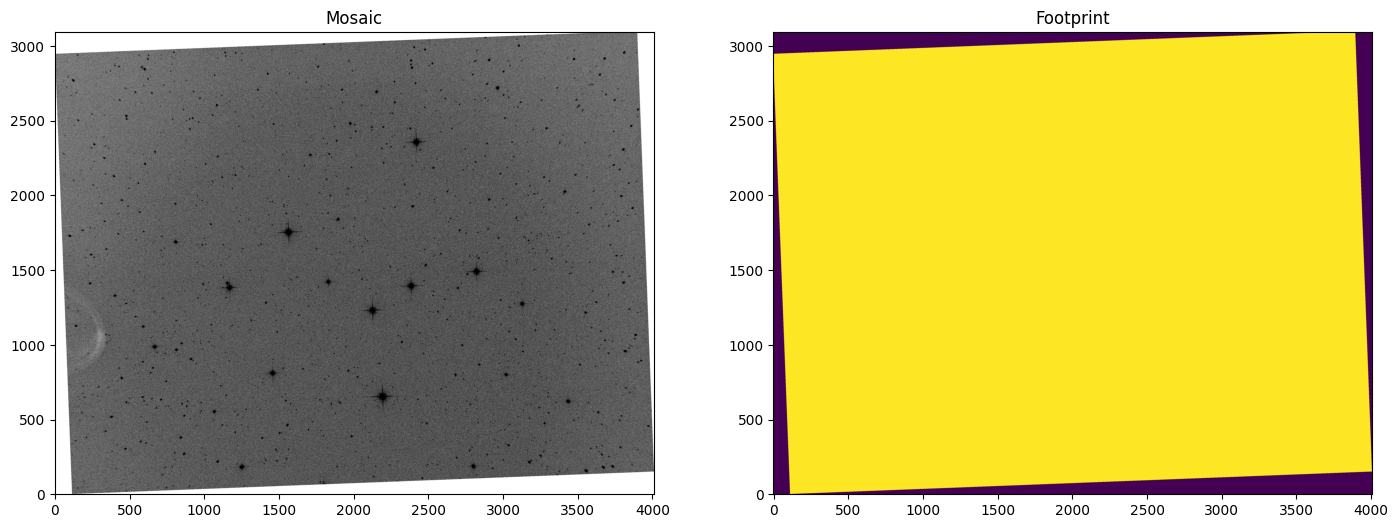

In [ ]:
# še narišem za kontrolo
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

plt.figure(figsize=(17, 8))
ax1 = plt.subplot(1, 2, 1)
norm = simple_norm(array, 'linear', percent=98.5)
im1 = ax1.imshow(array, origin='lower',  norm=norm, cmap='Grays')
ax1.set_title('Mosaic')
ax2 = plt.subplot(1, 2, 2)
im2 = ax2.imshow(footprint, origin='lower')
ax2.set_title('Footprint')
